In [ ]:
pip install pyMetaheuristic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 2.2 MB/s eta 0:00:00


In [ ]:
print(logits)
print(outputs)
print(score)

[0.0796449]
SequenceClassifierOutput(loss=None, logits=tensor([[0.0796]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
0.07964489609003067


In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.

In [ ]:
# Metaheuristic: Whale Optimization Algorithm

# Required Libraries
import numpy  as np
import math
import random
import os

############################################################################

# Function
def target_function():
    return

############################################################################

# Function: Initialize Variables
def initial_position(hunting_party = 5, min_values = [-5,-5], max_values = [5,5], target_function = target_function):
    position = np.zeros((hunting_party, len(min_values)+1))
    for i in range(0, hunting_party):
        for j in range(0, len(min_values)):
             position[i,j] = random.uniform(min_values[j], max_values[j])
        position[i,-1] = target_function(position[i,0:position.shape[1]-1])
    return position

# Function: Initialize Alpha
def leader_position(dimension = 2, target_function = target_function):
    leader = np.zeros((1, dimension+1))
    for j in range(0, dimension):
        leader[0,j] = 0.0
    leader[0,-1] = target_function(leader[0,0:leader.shape[1]-1])
    return leader

# Function: Updtade Leader by Fitness
def update_leader(position, leader):
    for i in range(0, position.shape[0]):
        if (leader[0,-1] > position[i,-1]):
            for j in range(0, position.shape[1]):
                leader[0,j] = position[i,j]
    return leader

# Function: Updtade Position
def update_position(position, leader, a_linear_component = 2, b_linear_component = 1,  spiral_param = 1, min_values = [-5,-5], max_values = [5,5], target_function = target_function):
    for i in range(0, position.shape[0]):
            r1_leader = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
            r2_leader = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
            a_leader  = 2*a_linear_component*r1_leader - a_linear_component
            c_leader  = 2*r2_leader
            p         = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
            for j in range (0, len(min_values)):
                if (p < 0.5):
                    if (abs(a_leader) >= 1):
                        rand              = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
                        rand_leader_index = math.floor(position.shape[0]*rand);
                        x_rand            = position[rand_leader_index, :]
                        distance_x_rand   = abs(c_leader*x_rand[j] - position[i,j])
                        position[i,j]     = np.clip( x_rand[j] - a_leader*distance_x_rand, min_values[j],  max_values[j])
                    elif (abs(a_leader) < 1):
                        distance_leader   = abs(c_leader*leader[0,j] - position[i,j])
                        position[i,j]     = np.clip(leader[0,j] - a_leader*distance_leader, min_values[j],  max_values[j])
                elif (p >= 0.5):
                    distance_Leader       = abs(leader[0,j] - position[i,j])
                    rand                  = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
                    m_param               = (b_linear_component - 1)*rand + 1
                    position[i,j]         = np.clip( (distance_Leader*math.exp(spiral_param*m_param)*math.cos(m_param*2*math.pi) + leader[0,j]), min_values[j],  max_values[j])
            position[i,-1] = target_function(position[i,0:position.shape[1]-1])
    return position

############################################################################

# WOA Function
def whale_optimization_algorithm(hunting_party = 5, spiral_param = 1,  min_values = [-5,-5], max_values = [5,5], iterations = 50, target_function = target_function, verbose = True):
    count    = 0
    position = initial_position(hunting_party = hunting_party, min_values = min_values, max_values = max_values, target_function = target_function)
    leader   = leader_position(dimension = len(min_values), target_function = target_function)
    while (count <= iterations):
        if (verbose == True):
            print('Iteration = ', count, ' f(x) = ', leader[0,-1])
        a_linear_component =  2 - count*( 2/iterations)
        b_linear_component = -1 + count*(-1/iterations)
        leader             = update_leader(position, leader)
        position           = update_position(position, leader, a_linear_component = a_linear_component, b_linear_component = b_linear_component,  spiral_param = spiral_param, min_values = min_values, max_values = max_values, target_function = target_function)
        count              = count + 1
    return leader


In [ ]:
# Required Libraries
import itertools
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio

from scipy.sparse.linalg import svds

############################################################################

# Function: Solution Plot
def plot_single_function(min_values, max_values, target_function, step = [0.1, 0.1], solution = [ ], proj_view = '3D', view = 'browser'):
    if (view == 'browser' ):
        pio.renderers.default = 'browser'
    x    = []
    data = []
    for j in range(0, len(min_values)):
        values = np.arange(min_values[j], max_values[j], step[j])
        x.append(values)
    cartesian_product = list(itertools.product(*x))
    front             = np.array(cartesian_product, dtype = np.dtype('float'))
    front             = np.c_[ front, np.zeros(len(cartesian_product)) ]
    value             = [target_function(item) for item in cartesian_product]
    front[:, -1]      = value
    nid_list          = [ 'f(x) = '+str(round(item, 4)) for item in value]
    if (proj_view == '1D' or proj_view == '1d' or proj_view == '2D' or proj_view == '2d'):
        if (len(solution) > 0):
            sol     = np.array(solution)
            c_sol   = ['f(x) = '+str(round(target_function(item), 2)) for item in sol]
            if ( (proj_view == '1D' or proj_view == '1d') and len(min_values) > 1):
                if (sol.shape[0] == 1):
                    sol = np.vstack([sol, sol])
                sol, _, _ = svds(sol, k = 1)
            if ( (proj_view == '2D' or proj_view == '2d') and len(min_values) > 2):
                if (sol.shape[0] == 1):
                    sol = np.vstack([sol, sol])
                sol, _, _ = svds(sol, k = 2)
            s_trace = go.Scatter(x         = sol[:, 0],
                                 y         = sol[:, 1],
                                 opacity   = 1,
                                 mode      = 'markers+text',
                                 marker    = dict(symbol = 'circle-dot', size = 10, color = 'red'),
                                 hovertext = c_sol,
                                 name      = ''
                                 )
            data.append(s_trace)
        if ( len(min_values) > 2):
            sol, _, _  = svds(front[:,:-1], k = 2)
            front[:,0] = sol[:,0]
            front[:,1] = sol[:,1]
        n_trace = go.Scatter(x         = front[:, 0],
                             y         = front[:, 1],
                             opacity   = 0.5,
                             mode      = 'markers+text',
                             marker    = dict(symbol = 'circle-dot', size = 5, color = -front[:,-1]),
                             hovertext = nid_list,
                             name      = ''
                             )
        data.append(n_trace)
        layout  = go.Layout(showlegend   = False,
                            hovermode    = 'closest',
                            margin       = dict(b = 10, l = 5, r = 5, t = 10),
                            plot_bgcolor = 'white',
                            xaxis        = dict(  showgrid       = False,
                                                  zeroline       = False,
                                                  showticklabels = True,
                                                  tickmode       = 'array',
                                               ),
                            yaxis        = dict(  showgrid       = False,
                                                  zeroline       = False,
                                                  showticklabels = True,
                                                  tickmode       = 'array',
                                                )
                            )
        fig_aut = go.Figure(data = data, layout = layout)
        fig_aut.update_traces(textfont_size = 10, textfont_color = 'white')
        fig_aut.show()
    elif (proj_view == '3D' or proj_view == '3d'):
        if (len(solution) > 0):
            sol   = np.array(solution)
            c_val = [target_function(item) for item in sol]
            if ( len(min_values) > 2):
                if (sol.shape[0] == 1):
                    sol = np.vstack([sol, sol])
                sol, _, _ = svds(sol, k = 2)
            s_trace = go.Scatter3d(x         = sol[:, 0],
                                   y         = sol[:, 1],
                                   z         = c_val,
                                   opacity   = 1,
                                   mode      = 'markers+text',
                                   marker    = dict(size = 10, color = 'red'),
                                   name      = ''
                                   )
            data.append(s_trace)
        if ( len(min_values) > 2):
            sol, _, _  = svds(front[:,:-1], k = 2)
            front[:,0] = sol[:,0]
            front[:,1] = sol[:,1]
        n_trace = go.Scatter3d(x         = front[:, 0],
                               y         = front[:, 1],
                               z         = front[:,-1],
                               opacity   = 0.5,
                               mode      = 'markers+text',
                               marker    = dict(size = 5, color = -front[:,-1]),
                               name      = ''
                               )
        data.append(n_trace)
        layout  = go.Layout(showlegend   = False,
                            hovermode    = 'closest',
                            margin       = dict(b = 10, l = 5, r = 5, t = 10),
                            plot_bgcolor = 'white',
                            )
        fig_aut = go.Figure(data = data, layout = layout)
        fig_aut.update_traces(textfont_size = 10, textfont_color = 'white')
        fig_aut.update_scenes(xaxis_visible = False, yaxis_visible = False, zaxis_visible = False)
        fig_aut.show()
    else:
        dict_list = []
        color_lst = [0]*front.shape[0]
        if (len(solution) > 0):
            for i in range(0, len(solution)):
                sol   = np.array(solution[i])
                front = np.r_[front, np.zeros((1, front.shape[1])) ]
                color_lst.append(1)
                for j in range(0, sol.shape[0]):
                    front[-1, j] = sol[j]
        for j in range(0, len(min_values)):
            dict_list.append(dict(range = [min_values[j]*1.00, max_values[j]*1.00], label = 'x'+str(j+1), values = front[:,j]))
        lines = go.Parcoords(
                             line       = dict(color = color_lst, colorscale = [[0,'lightblue'], [0.5,'lightblue'], [1,'red']]),
                             dimensions = dict_list
                            )
        fig_aut = go.Figure(data = lines)
        fig_aut.update_layout(font = dict(family = 'Arial Black', size = 15, color = 'black'))
        fig_aut.show()
    return

############################################################################

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
from pyMetaheuristic.utils import graphs
from pyMetaheuristic.algorithm import whale_optimization_algorithm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load KDD dataset
df = pd.read_csv('/content/KDDCup99.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [ ]:
# /df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

ValueError: ignored

In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


In [ ]:
df.label

0         normal
1         normal
2         normal
3         normal
4         normal
           ...  
494015    normal
494016    normal
494017    normal
494018    normal
494019    normal
Name: label, Length: 494020, dtype: object

In [ ]:
X = df.iloc[:, :-1]
y = np.where(df.label == b'normal.', 0, 1)  # Binary classification: normal vs. attack

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [ ]:
X.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [ ]:
X.drop(['protocol_type', 'service', 'flag'], axis = 1, inplace = True)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the objective function for WOA
def objective_function(variables_values):
    # Assuming you want to optimize hyperparameters for a RandomForestClassifier
    n_estimators, max_depth = variables_values
    clf = RandomForestClassifier(n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return 1 - acc  # Minimize 1 - accuracy

In [ ]:
# # WOA - Parameters
# woa_parameters = {
#     'hunting_party': 150,
#     'min_values': (1, 1),  # Minimum values for hyperparameters (e.g., number of estimators, max depth)
#     'max_values': (100, 10),  # Maximum values for hyperparameters
#     'iterations': 50,  # Adjust as needed
#     'spiral_param': 0.5,
#     'verbose': True
# }
# WOA - Parameters
woa_parameters = {
    'hunting_party': 150,
    'min_values': (1, 1),  # Minimum values for hyperparameters (e.g., number of estimators, max depth)
    'max_values': (100, 10),  # Maximum values for hyperparameters
    'iterations': 1,  # Adjust as needed
    'spiral_param': 0.5,
    'verbose': True
}

In [ ]:
# WOA - Algorithm
woa = whale_optimization_algorithm(target_function=objective_function, **woa_parameters)

Iteration =  0  f(x) =  0.0
Iteration =  1  f(x) =  0.0


In [ ]:
woa_parameters1 = {
    # 'hunting_party': 150,
    'min_values': (1, 1),  # Minimum values for hyperparameters (e.g., number of estimators, max depth)
    'max_values': (5, 5),  # Maximum values for hyperparameters
    # 'iterations': 1,  # Adjust as needed
    # 'spiral_param': 0.5,
    # 'verbose': True
}

In [ ]:
# Target Function - Values
plot_parameters = {
    'min_values': (2, 4),
    'max_values': (5, 5),
    'step': (0.1, 0.1),
    'solution': [],
    'proj_view': '3D',
    'view': 'notebook'
}
graphs.plot_single_function(target_function = objective_function, **plot_parameters)

In [ ]:
# Get the best hyperparameters
best_hyperparameters = woa.plot_single_function()

AttributeError: ignored

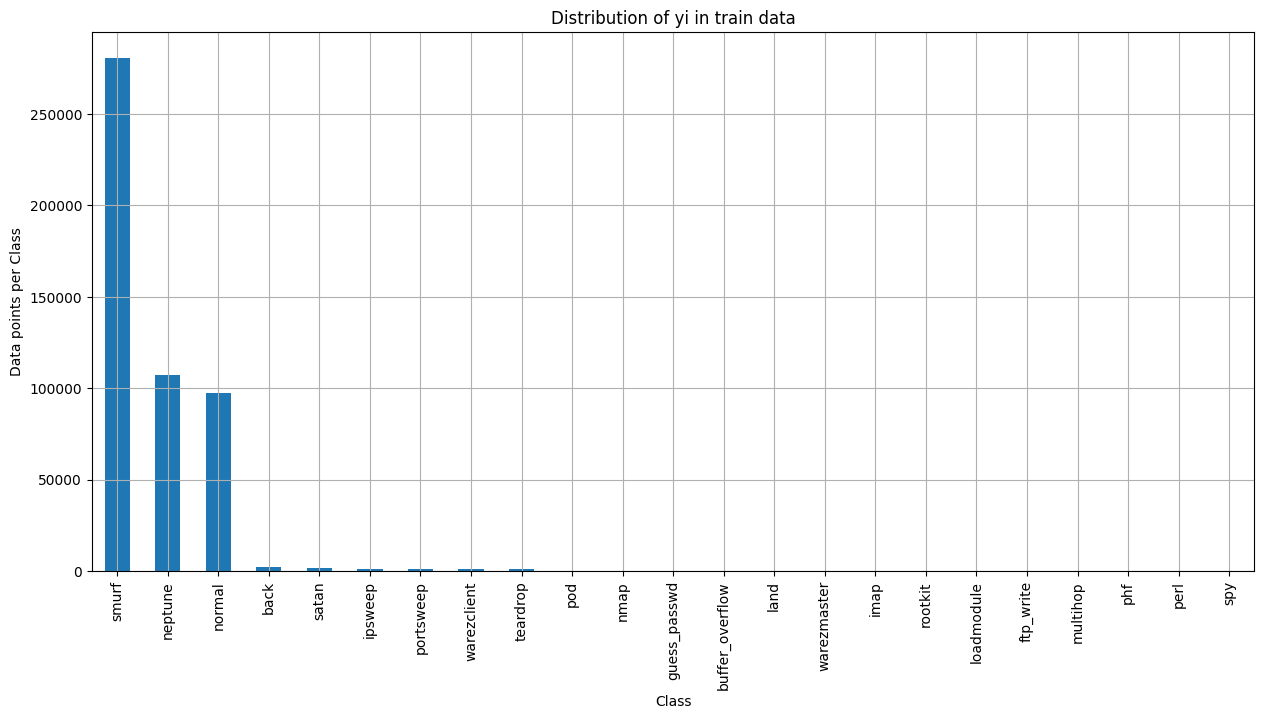

AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [ ]:
def objective(solution):
    # Extract features and target from solution
    features = df.iloc[:, :-1]
    target = df.iloc[:, -1]

    # Use solution values (weights) to calculate predicted values
    # (replace with your model here)
    predictions = (features * solution).sum(axis=1)

    # Calculate error metric (e.g., mean squared error)
    error = ((target - predictions) ** 2).mean()

    return error

# Define WOA parameters

swarm_size = 50  # Number of whales
iterations = 100  # Maximum iterations

In [ ]:
from sklearn.linear_model import LogisticRegression
features = df.iloc[:, :-1]
target = df.iloc[:, -1]
clf = LogisticRegression(C=1.0)
clf.fit(features, target)

ValueError: ignored

In [ ]:
# Train a model with the best hyperparameters
best_clf = RandomForestClassifier(n_estimators=int(best_hyperparameters[0]), max_depth=int(best_hyperparameters[1]), random_state=42)
best_clf.fit(X_train, y_train)

IndexError: ignored

In [ ]:
# Evaluate the model
y_pred_test = best_clf.predict(X_test)

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred_test)

In [ ]:
print(f"Best Hyperparameters: {best_hyperparameters}")
print(f"Accuracy on Test Set: {accuracy_test}")